# Introduction

In this section of the project I will do some more exploratory data analysis, but this time using visualizations to aid in the exploration.

I will be using the dataset that was gathered from the Space X API in this file.

Start by importing the dataset in a dataframe:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/launch_data_api_with_target.csv')

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploring the Data with Visualizations

The first thing I want to look at is to see how th `Flight_Number` and `Payload` variables affect the launch outcome.

Suppose we plot `Flight_Number` vs. `Payload_Mass`:

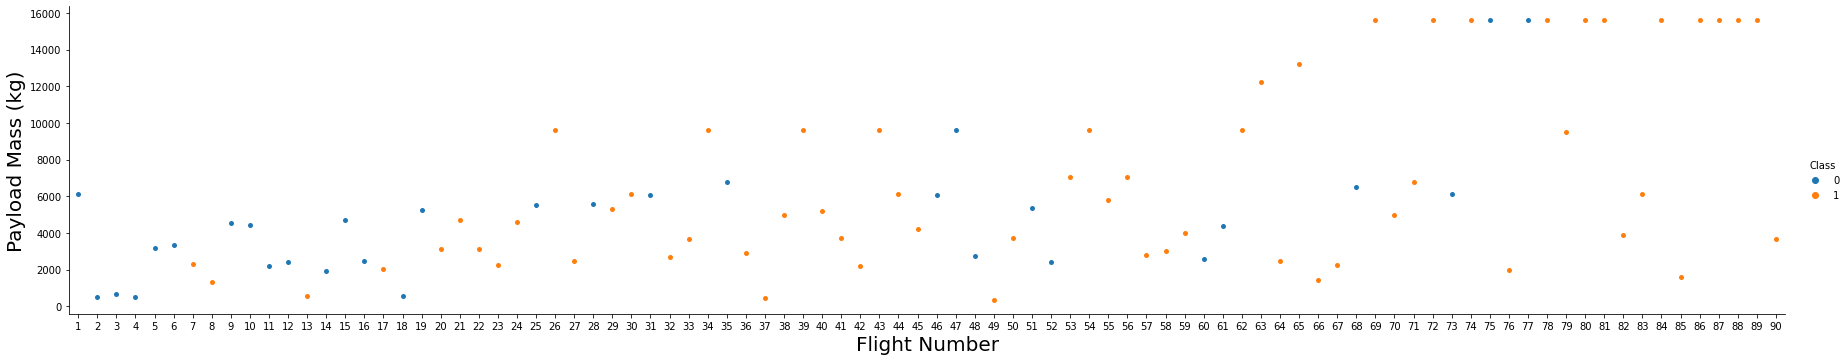

In [3]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Payload Mass (kg)', fontsize=20)
plt.show()

From the first plot, we can see that as the flight number increases, the likelihood of landing success seems to increase. As the payload mass increases, it looks like the success rate goes up too.

### Task 1

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>.

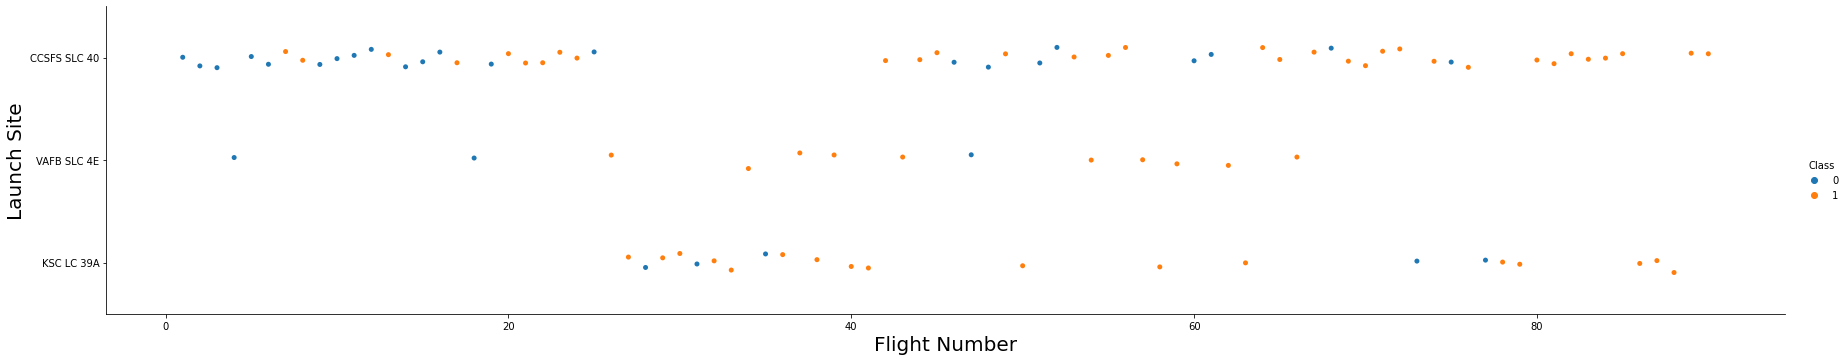

In [5]:
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

In the second plot, we can see a variation in the success rate for different launch sites as well.

### Task 2: Visualize the relationship between Payload and Launch Site

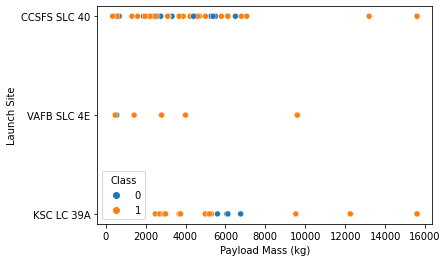

In [7]:
sns.scatterplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()

It is hard to determine a pattern here because most launches have payloads less than 8000 kg. We can see, however, that launches at VAFB did not have a payload mass more than 10000 kg.

### TASK  3: Visualize the relationship between success rate of each orbit type
Let's create a bar chart for the sucess rate of each orbit


In [20]:
success_rate = df[['Orbit', 'Class']].groupby(by='Orbit').mean().reset_index()
success_rate.rename(columns={'Orbit': 'Orbit', 'Class': 'Success Rate'}, inplace=True)
success_rate

,Orbit,Success Rate
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


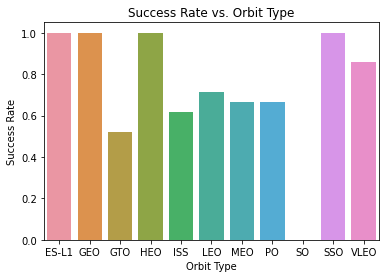

In [23]:
sns.barplot(data=success_rate, x='Orbit', y='Success Rate')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Orbit Type')
plt.show()